In [1]:
import numpy as np
import pandas as pd

In [2]:
from datetime import datetime, timedelta

In [3]:
now = datetime.now()
now

datetime.datetime(2021, 6, 2, 16, 46, 21, 842511)

In [4]:
now.year, now.month, now.day, now.weekday() # 요일

(2021, 6, 2)

In [5]:
# 시간 차이
delta = datetime(2011,1,7) - datetime(2020,1,1, 15)
delta

datetime.timedelta(days=-3282, seconds=32400)

In [6]:
delta.days, delta.seconds

(-3282, 32400)

In [7]:
start = datetime(2011,1,1)
start + timedelta(12)

datetime.datetime(2011, 1, 13, 0, 0)

### 문자열 -> datetime

In [8]:
stamp = datetime(2011,1,3, 13, 12, 55)
str(stamp)

'2011-01-03 13:12:55'

In [9]:
type(stamp)

datetime.datetime

In [10]:
stamp.strftime('%Y-%m-%d %H:%M:%S %w') # %w 요일[0 일요일]

'2011-01-03 13:12:55 1'

In [11]:
stamp.strftime('%F') # %Y-%m-%d

'2011-01-03'

In [12]:
stamp.strftime('%y-%m-%d %I:%M:%S')

'11-01-03 01:12:55'

In [13]:
stamp.strftime('%D') # %m/%d/%y

'01/03/11'

In [14]:
from dateutil.parser import parse # 거의 대부분 사람이 인지하는 날짜 표현 파싱 

In [15]:
parse('2011-01-01')

datetime.datetime(2011, 1, 1, 0, 0)

In [16]:
parse('Jan 31, 1997 10:45 PM', dayfirst=True)

datetime.datetime(1997, 1, 31, 22, 45)

## Index

In [17]:
date = datetime(2021,1,1)
dates = []
for _ in range(6):
    dates += [date]
    date = date + timedelta(days=1)

In [18]:
dates

[datetime.datetime(2021, 1, 1, 0, 0),
 datetime.datetime(2021, 1, 2, 0, 0),
 datetime.datetime(2021, 1, 3, 0, 0),
 datetime.datetime(2021, 1, 4, 0, 0),
 datetime.datetime(2021, 1, 5, 0, 0),
 datetime.datetime(2021, 1, 6, 0, 0)]

In [19]:
#dates = [datetime(2011,1,1), datetime(2011,1,2), datetime(2011,1,3), datetime(2011,1,4), datetime(2011,1,5), datetime(2011,1,6)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2021-01-01    1.025604
2021-01-02    0.053744
2021-01-03   -1.054337
2021-01-04    1.145118
2021-01-05   -0.057249
2021-01-06    0.547275
dtype: float64

In [20]:
ts.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq=None)

In [21]:
ts.dtype, ts.index.dtype

(dtype('float64'), dtype('<M8[ns]'))

In [22]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
print(longer_ts[:3], '\n\n',longer_ts['2001'][:3])

2000-01-01   -0.510535
2000-01-02   -0.688555
2000-01-03   -0.719652
Freq: D, dtype: float64 

 2001-01-01    0.634837
2001-01-02   -0.492473
2001-01-03    0.447557
Freq: D, dtype: float64


In [23]:
pd.date_range('1/1/2000 00:00', periods=10, freq='10T')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:10:00',
               '2000-01-01 00:20:00', '2000-01-01 00:30:00',
               '2000-01-01 00:40:00', '2000-01-01 00:50:00',
               '2000-01-01 01:00:00', '2000-01-01 01:10:00',
               '2000-01-01 01:20:00', '2000-01-01 01:30:00'],
              dtype='datetime64[ns]', freq='10T')

In [24]:
pd.PeriodIndex(year=[2000, 2002], quarter=[1,3])

PeriodIndex(['2000Q1', '2002Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

# Time Shifting
때때로 시계열 데이터의 인덱스에 따라 데이터를 일정한 간격으로 이동시켜야 할 경우가 있습니다. 그렇게 time shifting 된 데이터를 lagged 데이터라고 하는데, 시계열 데이터 분석 알고리즘 대부분은 이러한 lagged 데이터를 필요로 합니다. pandas 에는 이를 지원하는 함수들이 있어 편리하게 사용할 수 있습니다.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# csv 를 읽을 때부터 Date 칼럼을 인덱스로 지정
df = pd.read_csv('data/apple_stock.csv', index_col='Date')

In [3]:
df.index

Index(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=2265)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2265 entries, 2009-12-31 to 2018-12-31
Data columns (total 6 columns):
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: float64(6)
memory usage: 123.9+ KB


인덱스가 object 타입이므로 datetime 형으로 변환합니다.

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2009-12-31 to 2018-12-31
Data columns (total 6 columns):
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: float64(6)
memory usage: 123.9 KB


In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005


## shift forward

In [10]:
df.shift(1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [11]:
# 인덱스 밖으로 밀려난 마지막 데이터를 잃게 됩니다.
df.shift(1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,158.160004,149.630005,156.860001,150.729996,95744600.0,150.729996
2018-12-26,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-27,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-28,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-31,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


## shift backward

In [12]:
df.shift(-1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-04,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-05,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-06,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-07,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305


In [13]:
df.shift(-1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-28,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


## shifting based on offset alias

In [14]:
# 한 달 앞으로 모든 데이터를 shift
df.tshift(freq='M', periods=12).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-12-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-12-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-12-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


# Rolling & Expanding
시계열 데이터를 처리하고 분석하는 과정에서 Moving Average 를 구하기 위해 rolling mean 을 자주 사용하게 됩니다. pandas 는 이를 처리하기 위해 편리한 방법을 제공합니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 시계열 데이터를 인덱스와 함께 읽는 방법
df = pd.read_csv('data/apple_stock.csv', 
                 index_col='Date', parse_dates=True)

In [3]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


저장된 시간 형식을 임의로 지정해서 datetime 형태로 데이터 읽어오기

In [5]:
# 시간 형식 지정 ; strftime.org 참조
def dateparser(str_dt):
    return pd.datetime.strptime(str_dt, "%Y-%m-%d")

# TEST
dateparser('2019-01-01')

datetime.datetime(2019, 1, 1, 0, 0)

In [6]:
# putting all together
df = pd.read_csv('data/apple_stock.csv',
                 index_col='Date',
                 parse_dates=['Date'],
                 date_parser=dateparser)

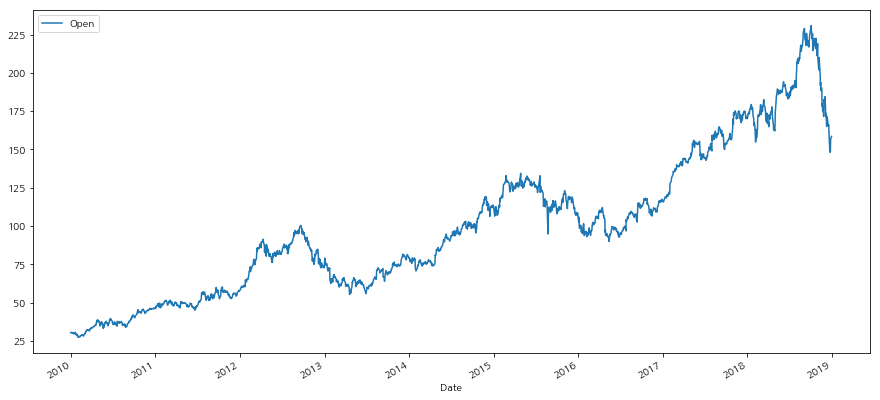

In [7]:
# Open 칼럼 시각화
df[['Open']].plot(figsize=(15,7))

**rolling** 메서드는 일정 시간구간의 윈도우를 row 엔트리로 만들어냅니다.

In [8]:
# 7 day rolling mean
df.rolling(7).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


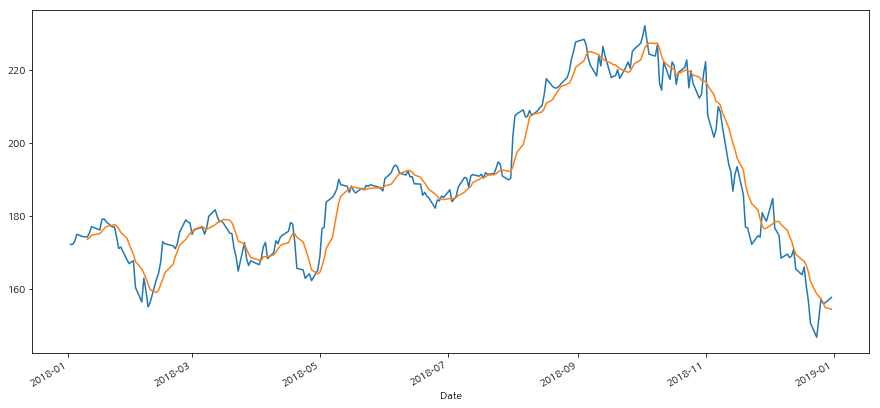

In [9]:
# Close 칼럼 실제 값과 7일치 rolling mean 을 함께 시각화 합니다.
df['2018':]['Close'].plot()
df['2018':].rolling(window=7).mean()['Close'].plot(figsize=(15,7))

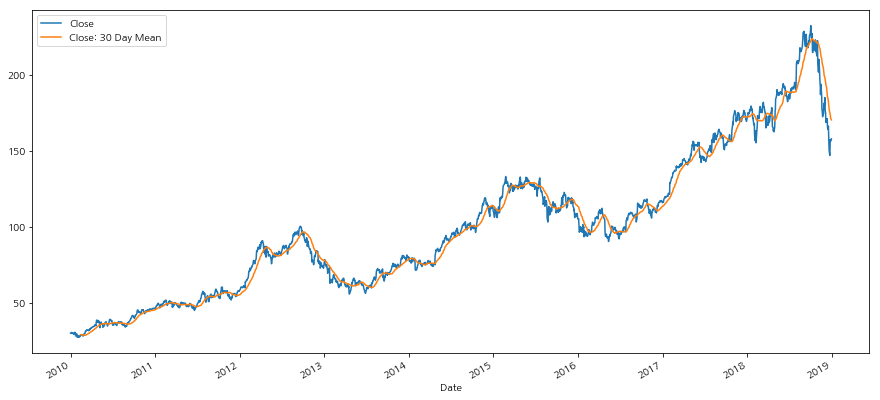

In [10]:
# 데이터프레임에 rolling mean 결과를 별도 칼럼으로 추가한 후 plotting 하면 pandas 는 칼럼 이름으로 범례(legend)를 만들어줍니다.
df['Close: 30 Day Mean'] = df['Close'].rolling(30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(15,7))

## expanding
rolling mean 을 시간간격에 국한시키지 않고 시계열 데이터의 시작점부터 넓혀가며 구하려면 **expanding** 메서드를 사용합니다.

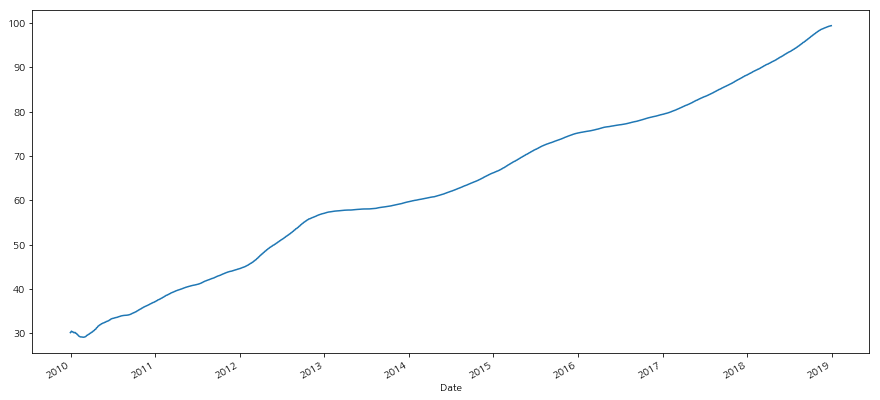

In [11]:
# min_periods : 최소 주기 설정
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7))

# Visualizing Time Series Data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
%matplotlib inline

In [2]:
df_apple = pd.read_csv('data/apple_stock.csv',index_col='Date',parse_dates=True)

In [3]:
df_apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


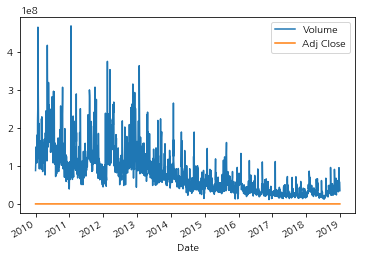

In [4]:
# Adj.Close 와 Adj.Volume 의 variance 문제로 보기 불편함.
df_apple[['Volume','Adj Close']].plot()

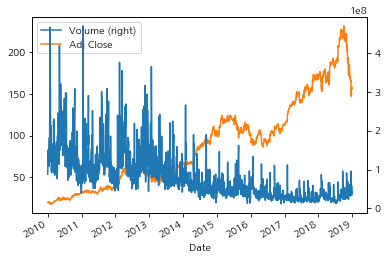

In [5]:
# Adj.Close 와 Adj.Volume 의 축을 함께 그리기
df_apple[['Volume','Adj Close']].plot(secondary_y=['Volume'])

# Plot Formatting

## XY Limits

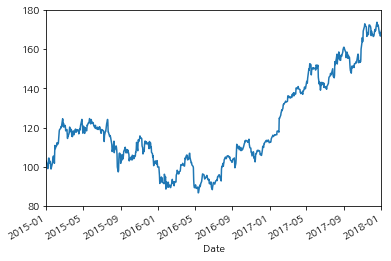

In [13]:
df_apple['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'],ylim=[80,180], ls='--',c='r')

# ETS Decomposition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Additive Model

$y_t = Level + Trend + Seasonality + Noise$

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
series = pd.Series([i+np.random.randint(10) for i in range(1,100)])

result = seasonal_decompose(series, model='additive', freq=1)

In [4]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

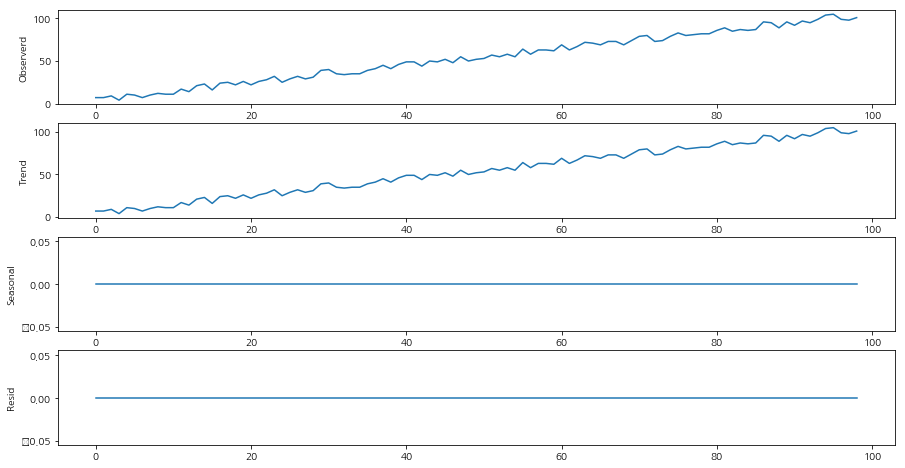

In [5]:
plot_decompose(result)

### Multiplicative Model

$y_t = Level \times Trend \times Seasonality \times Noise$

In [6]:
series = pd.Series([i**2 for i in range(1,100)])

result = seasonal_decompose(series, model='multiplicative', freq=1)

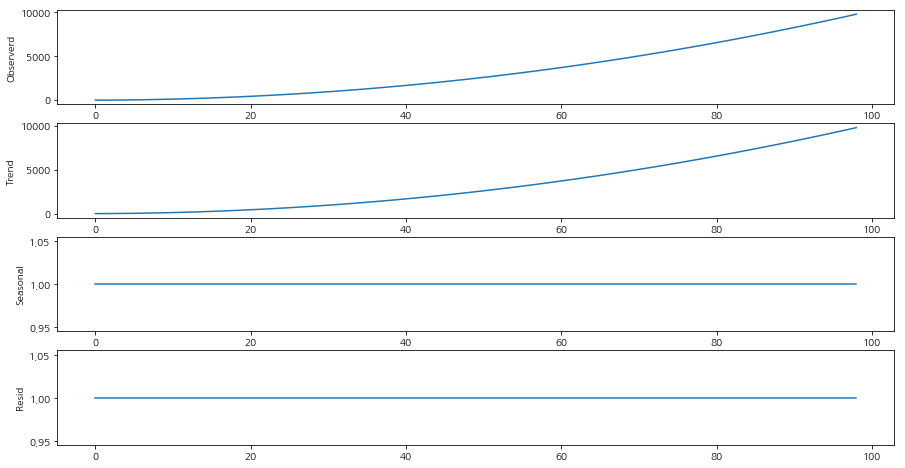

In [7]:
plot_decompose(result)

In [9]:
airline = pd.read_csv('data/airline_passengers.csv', index_col='Month')

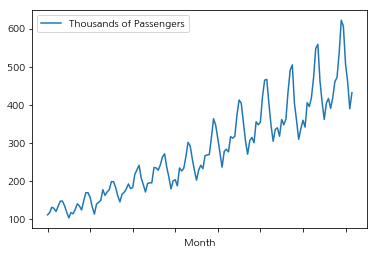

In [10]:
airline.plot()

## ETS

linear trend 를 가지고 있고 seasonality 와 trend 컴포넌트가 시간흐름에 따라 고정적일 때 (ex 매년 승객 1만명 증가) additive model 을 사용합니다. non-linear 하게 증가하거나 감소하는 trend 를 보일 경우 (ex 매년 승객 수 두 배 증가) multiplicative model 이 더 적합합니다.

챠트를 보면 초기에 비해 후기로 갈 수록 꾸준히 증가하는 비율로 비선형 증가 추세를 보이고 있습니다.

In [11]:
airline.index = pd.to_datetime(airline.index)

In [12]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

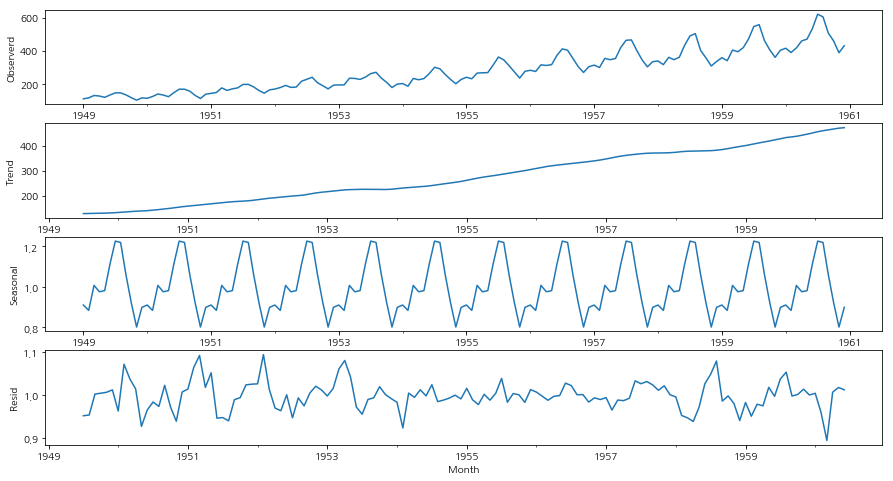

In [14]:
plot_decompose(result)

# Forecasting Models : SMA, WMA, SES, ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
airline = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Simple Moving Average

Moving Average 구하는 방법에 대해서는 앞서 rolling mean 을 통해 알아본 바 있습니다.

In [4]:
airline['6M SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12M SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [5]:
airline.head()

,Thousands of Passengers,6M SMA,12M SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN


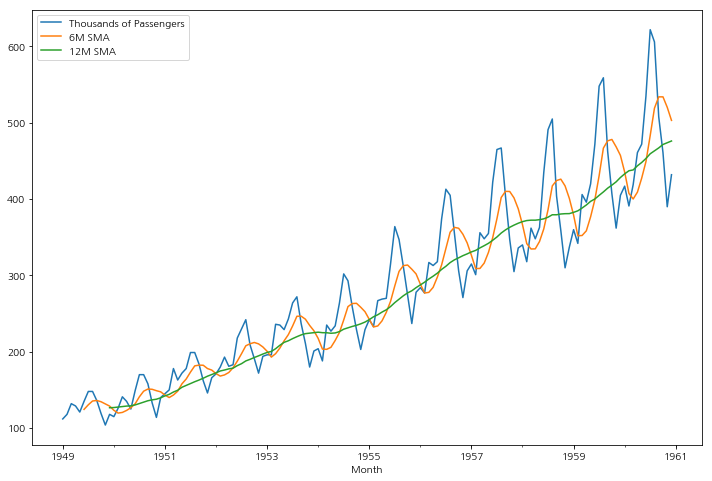

In [6]:
airline.plot(figsize=(12,8))

## Weighted Moving Averagem

In [7]:
airline['WMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline['WMA6'] = airline['Thousands of Passengers'].ewm(span=6).mean()

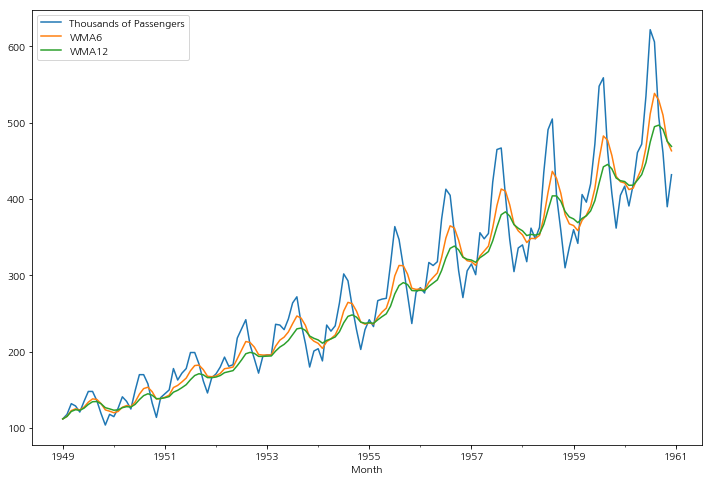

In [8]:
airline[['Thousands of Passengers', 'WMA6','WMA12']].plot(figsize=(12,8))

## Simple Exponential Smoothing

In [9]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [10]:
train = airline[:'1959']
test = airline['1960':]

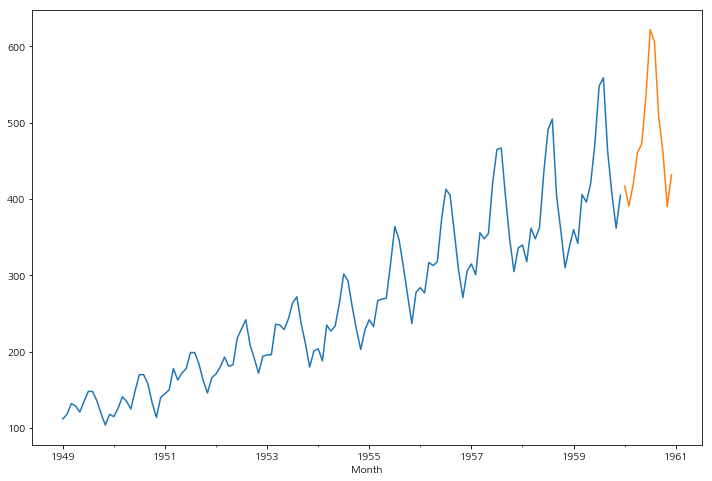

In [11]:
train['Thousands of Passengers'].plot(figsize=(12,8))
test['Thousands of Passengers'].plot()

In [12]:
ses_model = SimpleExpSmoothing(np.asarray(train['Thousands of Passengers']))

In [13]:
ses_result = ses_model.fit()

In [14]:
y_hat = test.copy()

In [15]:
y_hat['SES'] = ses_result.forecast(len(test))

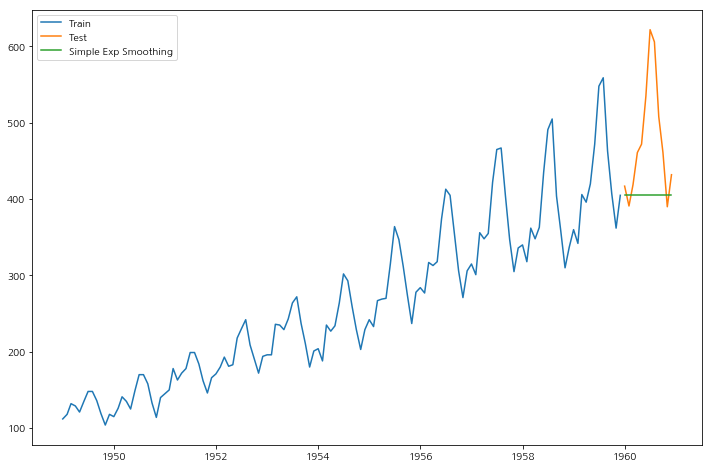

In [16]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['SES'], label='Simple Exp Smoothing')
plt.legend()

In [17]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['SES']))

In [18]:
rmse

102.97653454387881

## Holt's Method

In [19]:
from statsmodels.tsa.api import Holt

In [20]:
holt_model = Holt(np.asarray(train['Thousands of Passengers']))

In [21]:
holt_result = holt_model.fit()

In [22]:
y_hat['HOLT'] = holt_result.forecast(len(test))

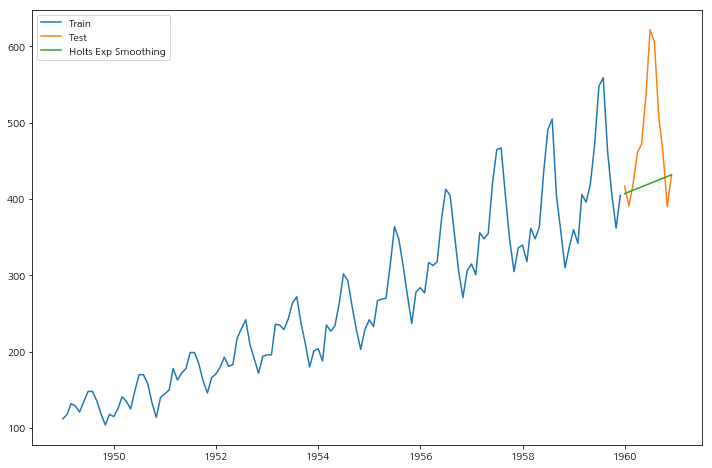

In [23]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['HOLT'], label='Holts Exp Smoothing')
plt.legend()

In [24]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['HOLT']))

In [25]:
rmse

92.6663528028185

## Holt-Winters Method

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing

In [27]:
winter_model = ExponentialSmoothing(
    np.asarray(train['Thousands of Passengers']),
    seasonal_periods=12, trend='add', seasonal='add'
)

In [28]:
winter_result = winter_model.fit()

In [29]:
y_hat['WINTER'] = winter_result.forecast(len(test))

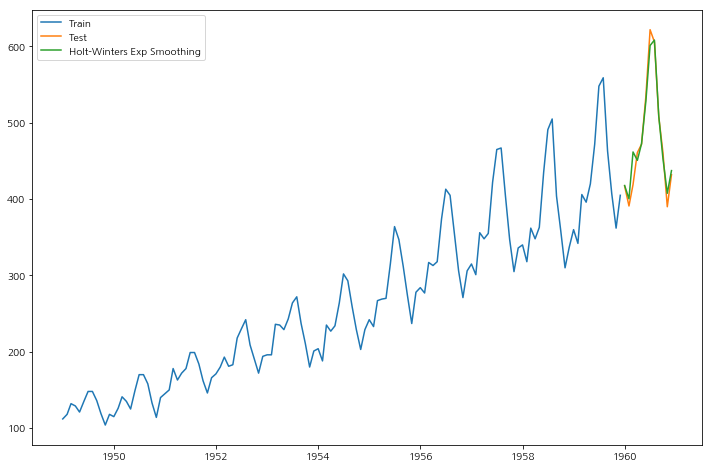

In [30]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['WINTER'], label='Holt-Winters Exp Smoothing')
plt.legend()

In [31]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['WINTER']))

In [32]:
rmse

15.57083049822115

## ARIMA

In [33]:
import statsmodels.api as sm

In [34]:
# ARIMA(p,d,q)(P,D,Q)m

arima = sm.tsa.statespace.SARIMAX(train['Thousands of Passengers'],
                                  order=(2,1,1),
                                  seasonal_order=(0,1,0,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [35]:
arima_result = arima.fit()

In [36]:
y_hat['ARIMA'] = arima_result.predict(start='1960-01-01', end='1960-12-01', dynamic=True)

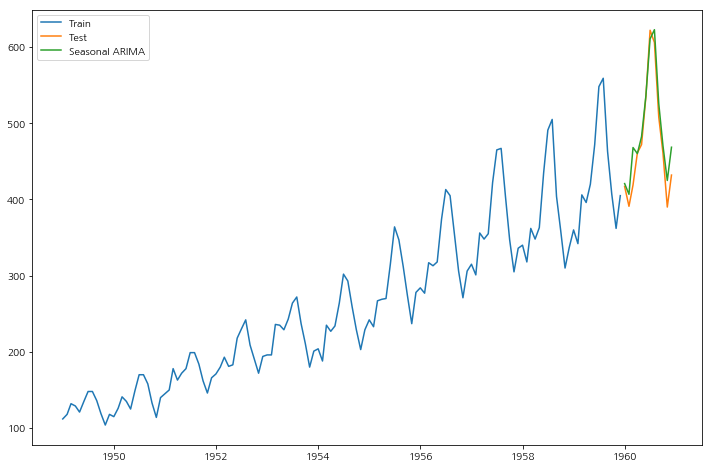

In [37]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

In [38]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['ARIMA']))

In [39]:
rmse

22.65096415638221

# ARIMA and Seasonal ARIMA

## Autoregressive Integrated Moving Averages

일반적으로 다음 프로세스를 따라 ARIMA 모델을 만듭니다:
* 시계열 데이터 시각화
* 시계열 데이터를 stationary 특성화
* Correlation 과 AutoCorrelation 챠트 플로팅
* ARIMA 모델 생성
* 만들어진 모델로 예측 수행

순서대로 다뤄봅시다.

## Step 1: 데이터 읽기와 포매팅

월별 우유 소비 데이터를 사용합니다. 데이터는 [Data Market](https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line) 에서 다운받아 저장해놓은 CSV 파일을 읽습니다.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/monthly-milk-production.csv', index_col='Month', parse_dates=True)

In [3]:
df.head()

,pounds per cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


## Step 2: Visualize the Data

pandas 내장 플로팅 함수들로 시계열 데이터를 시각화 해봅니다.

In [4]:
timeseries = df['pounds per cow']

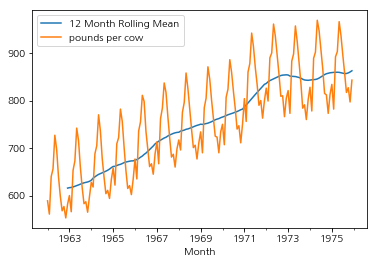

In [5]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

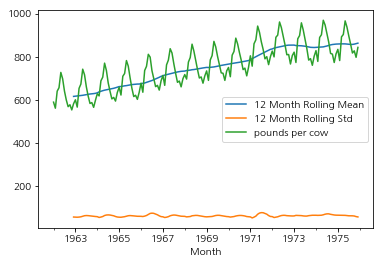

In [6]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

## Decomposition

ETS decomposition 을 통해서 시계열 데이터를 구성하는 요소들을 확인할 수 있습니다.

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
decomposition = seasonal_decompose(df['pounds per cow'])

<Figure size 432x288 with 0 Axes>

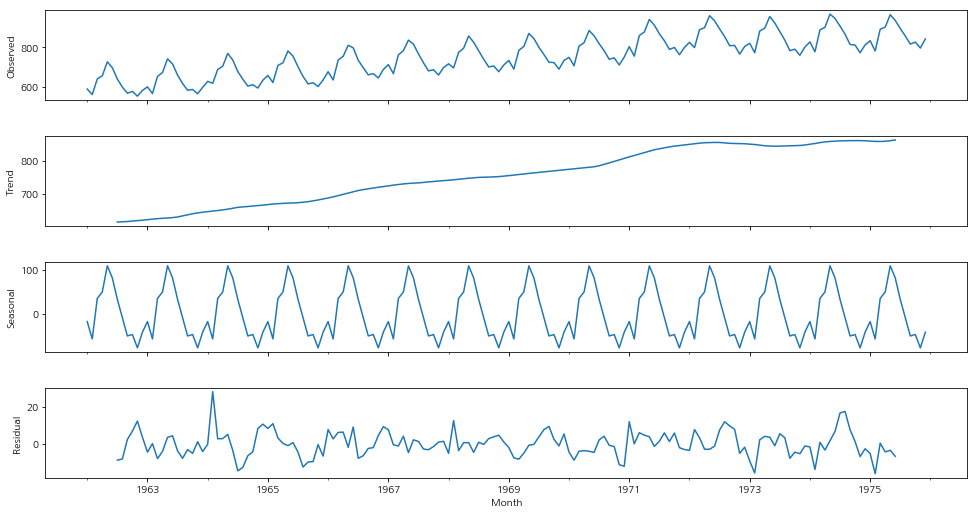

In [9]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,8)

## Testing for Stationarity

시계열 데이터의 Stationarity 특성을 시험하기 위해 Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test) 를 사용합니다.

Augmented Dicky-Fuller (ADF) test 는 시계열 데이터 샘플에 단위근(unit root)이 존재한다는 귀무가설을 시험하므로써 대립가인 stationarity 또는 trend-stationarity 여부를 확인합니다. 

시계열 데이터에 unit root 가 있어 non-stationary 하다는 귀무가설 H0 를 accept 할지, 또는 이를 reject 하면서 시계열 데이터에 unit root 가 없고 stationary 하다는 대립가설을 채택할지를 실험하는 것입니다.

결국 결과값 p-value 로 결정하게 됩니다.

* p-value 값이 작을 때 (≤ 0.05) 귀무가설을 reject 하고 데이터는 stationary 함

* p-value 값이 클 (> 0.05) 귀무가설을 accept 하고 데이터는 non-stationary 함

가공한 데이터에 ADF 테스트를 해봅시다:

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
result = adfuller(df['pounds per cow'])

In [12]:
result

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [13]:
# 반복적인 사용을 위해 함수화 합니다.
def adf_check(ts):
    result = adfuller(ts)
    if result[1] <= 0.05:
        print('Stationary {}'.format(result[1]))
    else:
        print('Non-Stationary {}'.format(result[1]))

In [14]:
adf_check(df['pounds per cow'])

Non-Stationary 0.627426708603034


## Differencing

시계열 데이터에 대한 1차(first) difference 는 다음 스탭으로의 한 차원(시간단위) 만큼의 변화값의 series 입니다. pandas 를 이용하면 아주 differencing 할 수 있습니다. 2차, 3차, 그보다 더 높은 차원의 differencing 을 시도해보고 stationary 한 차원을 찾습니다.

#### First Difference

In [15]:
df['1st diff'] = df['pounds per cow'] - df['pounds per cow'].shift(1)

In [16]:
df.head()

,pounds per cow,1st diff
Month,,
1962-01-01,589,NaN
1962-02-01,561,-28.0
1962-03-01,640,79.0
1962-04-01,656,16.0
1962-05-01,727,71.0


In [17]:
adf_check(df['1st diff'].dropna())

Stationary 0.03006800400178688


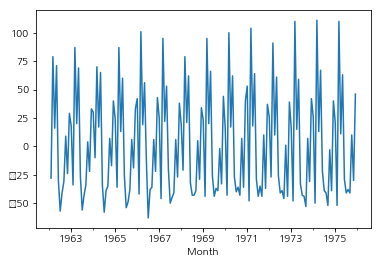

In [18]:
df['1st diff'].plot()

#### Second Differencing

In [19]:
df['2nd diff'] = df['1st diff'] - df['1st diff'].shift(1)

In [20]:
adf_check(df['2nd diff'].dropna())

Stationary 1.1126989332083069e-26


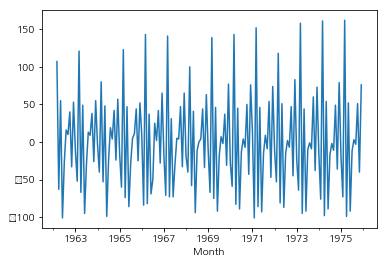

In [21]:
df['2nd diff'].plot()

#### Seasonal Difference

In [22]:
df['seasonal diff'] = df['pounds per cow'] - df['pounds per cow'].shift(12)

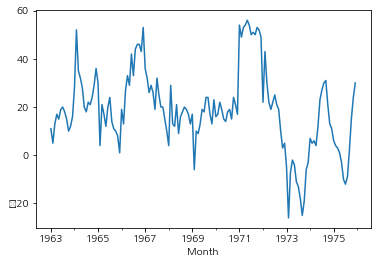

In [23]:
df['seasonal diff'].plot()

In [24]:
adf_check(df['seasonal diff'].dropna())

Non-Stationary 0.16079880527711304


결과상 seasonality 만 아니라 trend 도 가지고 있으므로 1차 differencing 한 데이터에 대한 seasonal differencing 을 수행해봅니다.

#### Seasonal First Difference

In [25]:
df['seasonal 1st diff'] = df['1st diff'] - df['1st diff'].shift(12)

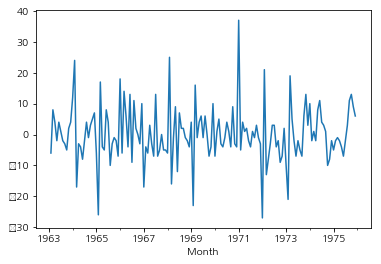

In [26]:
df['seasonal 1st diff'].plot()

In [27]:
adf_check(df['seasonal 1st diff'].dropna())

Stationary 1.86542343187882e-05


이와 같은 과정에서 d=1, D=1 의 파라메터를 찾았습니다.

# Autocorrelation and Partial Autocorrelation Plots

ARIMA 의 p,q 파라메터를 찾기 위해 PACF 와 ACF 플롯을 참조합니다.

플롯에 대한 해석은 간단하지만은 않은데, [여기](http://people.duke.edu/~rnau/arimrule.htm) 와 [여기](https://people.duke.edu/~rnau/411arim3.htm) 에 ACF 와 PACF 를 해석하는 방법에 대한 정보가 자세히 나와있으니 참고하십시오. 

### Autocorrelation Interpretation

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

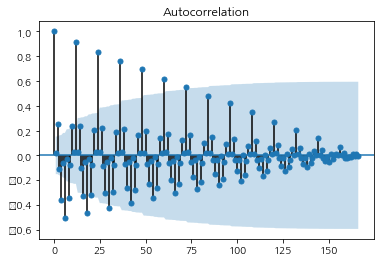

In [29]:
plot_acf(df['1st diff'].dropna());

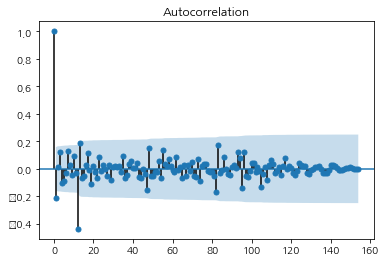

In [30]:
plot_acf(df['seasonal 1st diff'].dropna());

## Partial Autocorrelation

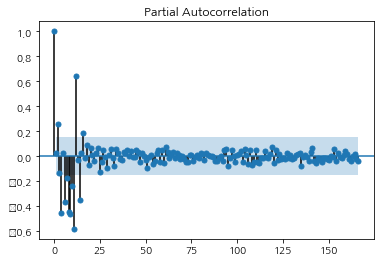

In [31]:
plot_pacf(df['1st diff'].dropna(), method='ywm');

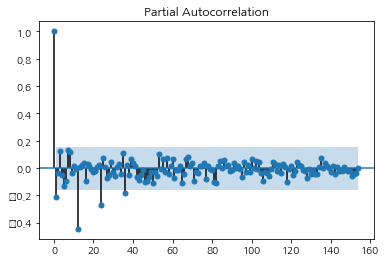

In [32]:
plot_pacf(df['seasonal 1st diff'].dropna(), method='ywm');

### Autocorrelation 과 Partial Autocorrelation 에 대한 요약

* AR 모델 판별은 대체로 PACF 를 통해 확인할 수 있습니다.
    * 이론적으로 PACF 는 AR 모델의 차수 이후 "shut off" 를 보입니다. "shut off"  되었다는 것은 partial autocorrelation 이 해당 지점 이후 0 과 같다는 의미입니다. 다른 말로, 0 아닌 partial autocorrelation 이 존재하는 차수가 AR 모델의 차수가 됩니다. 
    
* MA 모델에 대한 판별은 PACF 보다 ACF 더 명확히 확인됩니다.
    * MA 모델에 있어서 PACF 는 "shut off" 하지 않지만 0 을 향해 점진적으로 줄어듭니다. ACF 에 MA 모델이 좀 더 분명히 나타나는데, 모델과 관련된 lag 에 대해서만 0 아닌 autocorrelation 이 나타납니다.

## Seasonal ARIMA 모델 사용하기

In [33]:
model = sm.tsa.statespace.SARIMAX(df['pounds per cow'],
                                 order=(0,1,0),
                                 seasonal_order=(1,1,1,12))

/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [34]:
result = model.fit()

In [35]:
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Thu, 31 Jan 2019   AIC                           1074.131
Time:                                    19:14:21   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

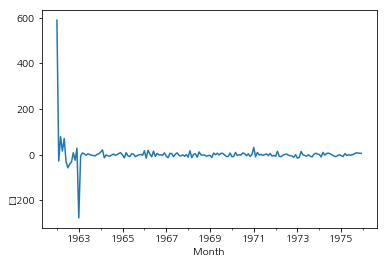

In [36]:
result.resid.plot()

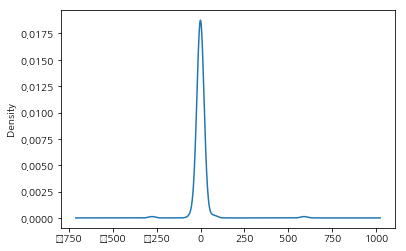

In [37]:
result.resid.plot(kind='kde')

## Prediction of Future Values

일단 생성된 모델이 이미 알고 있는 결과 대비 얼마나 좋은 예측 성능을 보여주는지 확인해봅시다:

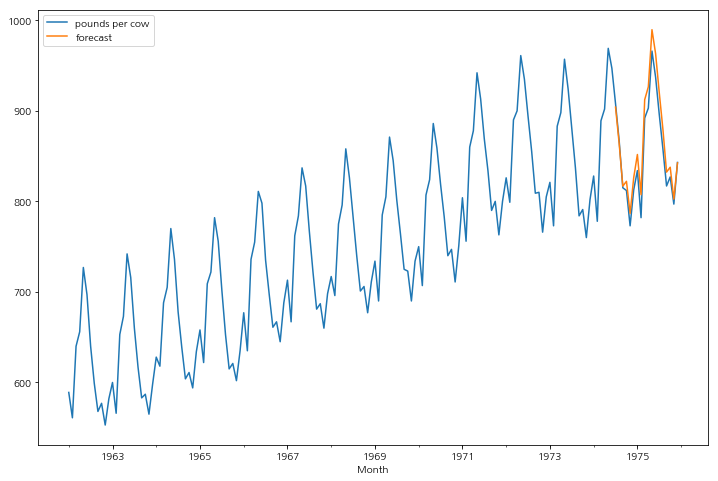

In [38]:
df['forecast'] = result.predict(start=150, end=168, dynamic=True)

df[['pounds per cow', 'forecast']].plot(figsize=(12,8))

# ARIMA and Rolling Forecast



In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터 읽기와 포매팅

데이터는 3년치 월별 샴푸 판매량으로 [Data Market](https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line) 에서 다운로드 받아 저장한 CSV 파일을 사용합니다.

In [2]:
# Month 칼럼을 읽기 위한 파서
def dateparser(x):
    return datetime.strptime('190'+x, "%Y-%m")
#    "1-01" => "1901-01"

In [3]:
shampoo = pd.read_csv('data/sales-of-shampoo.csv', index_col='Month', parse_dates=True, date_parser=dateparser)

In [4]:
shampoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
Sales of shampoo    36 non-null float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [5]:
shampoo.head()

,Sales of shampoo
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


## Visualize the data

pandas 내장 플로팅 함수들로 시계열 데이터를 시각화 해봅니다. 뚜렷한 트랜드를 보이는 반면 시즌 패턴은 보이지 않습니다.

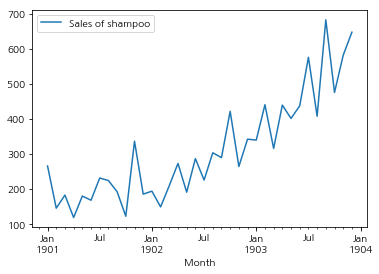

In [6]:
shampoo.plot()

## Testing for Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
def adf_check(ts):
    result = adfuller(ts)
    if result[1] <= 0.05:
        print('Stationary {}'.format(result[1]))
    else:
        print('Non-Stationary {}'.format(result[1]))

In [9]:
adf_check(shampoo['Sales of shampoo'])

Non-Stationary 1.0


테스트 결과 데이터가 stationary 특성을 보이지 않고 있음이 확인됩니다.

## Differencing

시계열 데이터에 대한 1차(first) difference 는 다음 스탭으로의 한 차원(시간단위) 만큼의 변화값의 series 입니다. pandas 를 이용하면 아주 differencing 할 수 있습니다. 1차, 2차 등 differencing 을 시도해보고 stationary 한 차원을 찾습니다.

#### First Difference

In [10]:
shampoo['1st diff'] = shampoo['Sales of shampoo'] - shampoo['Sales of shampoo'].shift(1)

In [11]:
adf_check(shampoo['1st diff'].dropna())

Stationary 1.7998574141687034e-10


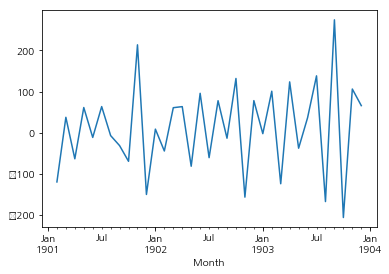

In [12]:
shampoo['1st diff'].plot()

#### Second Difference

In [13]:
shampoo['2nd diff'] = shampoo['1st diff'] - shampoo['1st diff'].shift()

In [14]:
adf_check(shampoo['2nd diff'].dropna())

Stationary 0.0039063349396599245


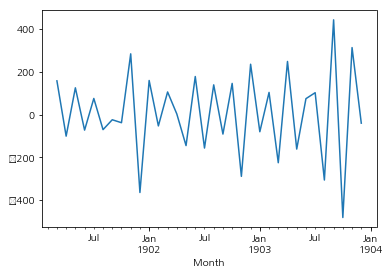

In [15]:
shampoo['2nd diff'].plot()

## Autocorrelation and Partial Autocorrelation Plots

In [16]:
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

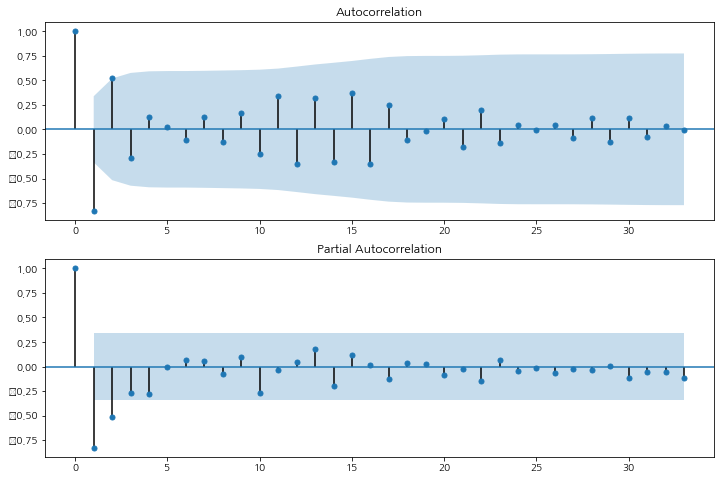

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(shampoo['2nd diff'].dropna(), ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(shampoo['2nd diff'].dropna(), ax=ax2, method='ywm')

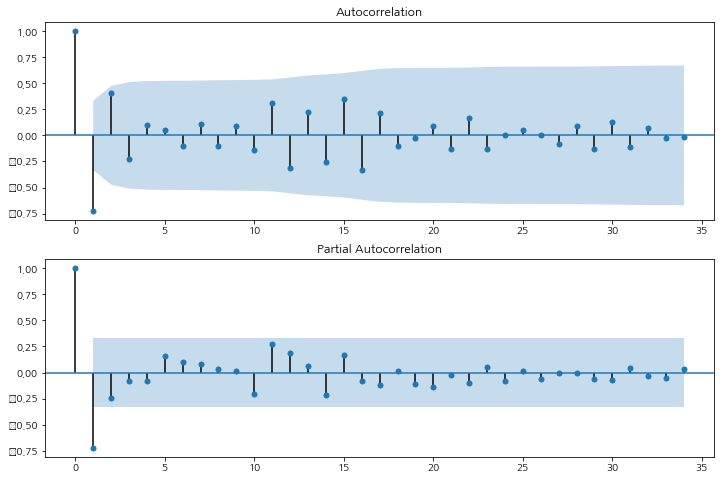

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(shampoo['1st diff'].dropna(), ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(shampoo['1st diff'].dropna(), ax=ax2, method='ywm')

PACF 와 ACF 에서 각각 lag 1 에 대해 강한 상관관계를 보이고 있습니다.

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
model = ARIMA(shampoo['Sales of shampoo'], order=(1,1,1), freq='MS')
model_fit = model.fit(disp=0)

In [21]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:     D.Sales of shampoo   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Thu, 31 Jan 2019   AIC                            402.467
Time:                        19:34:34   BIC                            408.688
Sample:                    02-01-1901   HQIC                           404.614
                         - 12-01-1903                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.0965      3.651      3.313      0.002       4.940      19.253
ar.L1.D.Sales of shampoo    -0.5674      0.161     -3.526      0.001      -0.883      -0.

일단 residual error 에 대해 line plot 을 그려고보 모델에 의해 파악되지 않은 트랜드 정보가 있는지 확인합니다.

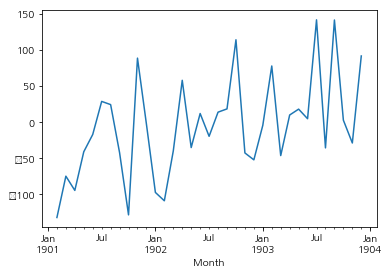

In [22]:
# plot residual errors
model_fit.resid.plot()

다음으로 residual error 에 대한 density plot 을 그리고 정규분포에 가까운지 확인합니다.

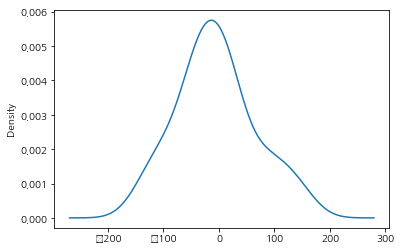

In [23]:
model_fit.resid.plot(kind='kde')

In [24]:
model_fit.resid.describe()

count     35.000000
mean      -5.505160
std       69.978598
min     -132.196527
25%      -42.395612
50%       -4.181400
75%       21.540075
max      142.155114
dtype: float64

## GridSearch
AIC 를 기준으로 최적의 p,d,q 파라메터를 찾습니다.

In [25]:
import itertools

p = range(0,5)
d = range(1,3)
q = range(0,5)

pdq = list(itertools.product(p, d, q))

In [26]:
aic_params = []

for param in pdq:
    try:
        mod = ARIMA(shampoo['Sales of shampoo'], order=param)
        results = mod.fit(disp=0)
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
        aic_params.append((results.aic, param,))
    except:
        pass

/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[

ARIMA(0, 1, 0) - AIC:430.87311187552797
ARIMA(0, 1, 1) - AIC:409.0126622411526
ARIMA(0, 2, 0) - AIC:461.1578257086931
ARIMA(0, 2, 1) - AIC:424.58251674821
ARIMA(1, 1, 0) - AIC:406.02228959235015
ARIMA(1, 1, 1) - AIC:402.4666524179953


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided

ARIMA(1, 1, 2) - AIC:401.5247943798928


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 3) - AIC:403.52417287508956
ARIMA(1, 2, 0) - AIC:423.90008603782104


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided

ARIMA(1, 2, 3) - AIC:nan


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
/home/lyle/anaconda3/envs/tsa/lib/py

ARIMA(1, 2, 4) - AIC:nan
ARIMA(2, 1, 0) - AIC:403.6275641166603
ARIMA(2, 1, 1) - AIC:404.28621423318384


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided

ARIMA(2, 2, 0) - AIC:412.99938249704275


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1) - AIC:396.65262382813955


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 3) - AIC:389.68350650892074
ARIMA(3, 1, 0) - AIC:404.6924591816878


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided

ARIMA(3, 1, 1) - AIC:406.1395443929549


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided

ARIMA(3, 2, 0) - AIC:410.9109265845758
ARIMA(3, 2, 1) - AIC:396.30623658353767
ARIMA(3, 2, 2) - AIC:nan


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, 

ARIMA(3, 2, 3) - AIC:406.104929451703
ARIMA(4, 1, 0) - AIC:404.78676855669903
ARIMA(4, 1, 1) - AIC:406.5796403612012


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 2) - AIC:400.2307795387626


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 3) - AIC:400.65677258685764


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 4) - AIC:406.3808484357497


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 2, 0) - AIC:403.9482289506873


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 2, 1) - AIC:393.1540750944809


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, 

ARIMA(4, 2, 2) - AIC:nan
ARIMA(4, 2, 3) - AIC:402.5718428919337


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [27]:
# ARIMA(4,2,1)
model = ARIMA(shampoo['Sales of shampoo'], order=(4,2,1))
results = model.fit()
print(results.summary())

/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D2.Sales of shampoo   No. Observations:                   34
Model:                  ARIMA(4, 2, 1)   Log Likelihood                -189.577
Method:                        css-mle   S.D. of innovations             56.216
Date:                 Thu, 31 Jan 2019   AIC                            393.154
Time:                         19:34:44   BIC                            403.839
Sample:                     03-01-1901   HQIC                           396.798
                          - 12-01-1903                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.8979      0.246      3.654      0.001       0.416       1.380
ar.L1.D2.Sales of shampoo    -1.2964      0.161     -8.036      0.000      -1.

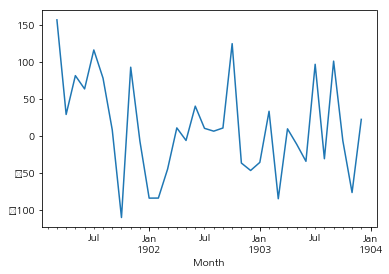

In [28]:
results.resid.plot()

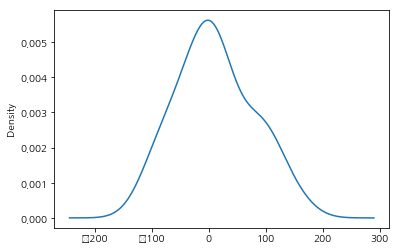

In [29]:
results.resid.plot(kind='kde')

In [30]:
results.resid.describe()

count     34.000000
mean      11.226048
std       66.730384
min     -110.457557
25%      -35.653924
50%        8.525816
75%       57.335824
max      156.402102
dtype: float64

## Rolling Forecast ARIMA Model

ARIMA 모델로 미래 데이터를 예측하기 위해 predict() 함수를 사용합니다. 이 함수는 파라메터로 예측할 타임스텝을(steps) 필요로하는데 학습 데이터에대한 인덱스 상대값을 입력하면 됩니다. 가령 모델을 학습하기 위해 100개의 학습데이터를 사용했다면 다음 스텝 예측값의 인덱스는 start=101, end=101 이 됩니다. 예측 결과 리턴값은 하나의 예측값을 포함한 배열이 됩니다.

또는 forcast() 함수로 파라메터 없이 다음 한 스템의 데이터를 예측할 수 있습니다. 

데이터를 train 과 test 로 나눈 뒤 train 데이터로 모델을 학습시키고 test 데이터의 각 시점에 해당하는 예측 해봅니다. 그러기 위해 새로운 actual value 를 하나씩 수집하면서 그와 함께 앞선 시점의 데이터로 ARIMA 모델을 학습과 예측을 반복하는 rolling forecast 를 수행하게 됩니다.

아래 코드에서 수동으로 관측값을을 history 변수에 추가해가면서 모델링과 예측을 반복하면서 prediction 과 expected value 를 출력하고 최종적으로 그에 따른 mean squared error (MSE) 를 계산합니다.

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = shampoo['Sales of shampoo'].values

# train , test 데이터를 2:1 로 split
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# 학습시킬 데이터
history = [x for x in train]
predictions = list()
# test 데이터만큼 모델링 & 예측
for t in range(len(test)):
    model = ARIMA(history, order=(4,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    # predicted value
    yhat = output[0]
    predictions.append(yhat)
    # actual value
    obs = test[t]
    # actual value 를 다음 스텝에서 학습할 데이터에 추가
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % sqrt(error))

predicted=399.145200, expected=342.300000
predicted=354.296566, expected=339.700000
predicted=429.967876, expected=440.400000
predicted=392.634689, expected=315.900000
predicted=420.191849, expected=439.300000
predicted=397.585316, expected=401.300000
predicted=487.892625, expected=437.400000
predicted=434.160085, expected=575.500000
predicted=467.057786, expected=407.600000


/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=568.082759, expected=682.000000
predicted=468.024731, expected=475.300000
predicted=687.491691, expected=581.300000
predicted=617.839224, expected=646.900000
Test RMSE: 68.519


실제값(파란색)과 rolling forecast(red) 결과를 비교해보면 트렌드를 어느정도 예측하고 있음을 확인할 수 있습니다.

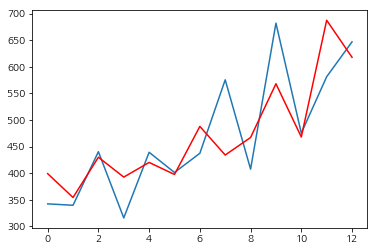

In [32]:
plt.plot(test)
plt.plot(predictions, color='red')